# Part Two: File Analysis

In [109]:
import pandas as pd
import matplotlib.pyplot as plt

__Read the file 2017_jun_final.csv__

In [110]:
df = pd.read_csv('2017_jun_final.csv')

__Read the resulting table using the head method__

In [111]:
df.head()

,N,Посада,Мова програмування,Спеціалізація,Загальний досвід роботи,Досвід роботи на поточному місці,Зарплата на місяць,Зміна зарплати за 12 місяців,Місто,Розмір компанії,...,Ще студент,Рівень англійської,Предметна область,Дата заповнення,User.Agent,exp,current_job_exp,salary,Валюта,cls
0,1,Junior QA engineer,NaN,Manual QA,0.5,0.5,400,0,Харків,до 10 осіб,...,True,Pre-intermediate (нище середнього),"iOS,eCommerce",12/06/2017 12:38:08,Mozilla/5.0 (Windows NT 10.0; Win64; x64) Appl...,0.5,0.5,400,NaN,QA
1,2,Junior QA engineer,NaN,Manual QA,менше 3 місяців,менше 3 місяців,430,130,Харків,більше 1000 осіб,...,True,Upper-Intermediate (вище середнього),Веб-розробка,12/06/2017 12:42:51,Mozilla/5.0 (iPad; CPU OS 10_2_1 like Mac OS X...,0.0,0.0,430,NaN,QA
2,3,Software Engineer,C#/.NET,NaN,4,1,2500,800,Київ,до 1000 осіб,...,False,Intermediate (середній),"Веб-розробка,Корпоративні системи",12/06/2017 13:02:47,Mozilla/5.0 (Windows NT 10.0; Win64; x64) Appl...,4.0,1.0,2500,NaN,DEV
3,4,Software Engineer,JavaScript,NaN,5,4,2000,400,Одеса,до 200 осіб,...,False,Pre-intermediate (нище середнього),"Desktop Applications,Веб-розробка",12/06/2017 13:03:01,Mozilla/5.0 (Windows NT 6.1; Win64; x64) Apple...,5.0,4.0,2000,NaN,DEV
4,5,Senior Software Engineer,JavaScript,NaN,10 і більше років,0.5,4500,500,Інше,до 10 осіб,...,False,Intermediate (середній),"Desktop Applications,Веб-розробка",12/06/2017 13:03:47,Mozilla/5.0 (iPhone; CPU iPhone OS 10_3_2 like...,10.0,0.5,4500,NaN,DEV


__Determine the size of the table__

In [112]:
df.shape

(8704, 25)

__Determine the types of all columns__

In [113]:
df.dtypes

N                                     int64
Посада                               object
Мова програмування                   object
Спеціалізація                        object
Загальний досвід роботи              object
Досвід роботи на поточному місці     object
Зарплата на місяць                    int64
Зміна зарплати за 12 місяців          int64
Місто                                object
Розмір компанії                      object
Тип компанії                         object
Стать                                object
Вік                                   int64
Освіта                               object
Університет                          object
Ще студент                             bool
Рівень англійської                   object
Предметна область                    object
Дата заповнення                      object
User.Agent                           object
exp                                 float64
current_job_exp                     float64
salary                          

__Calculate the proportion of missing values ​​in each column__

In [114]:
df.isnull().sum()

N                                      0
Посада                                 0
Мова програмування                  3850
Спеціалізація                       7219
Загальний досвід роботи                0
Досвід роботи на поточному місці       0
Зарплата на місяць                     0
Зміна зарплати за 12 місяців           0
Місто                                  0
Розмір компанії                        0
Тип компанії                           0
Стать                                  0
Вік                                    0
Освіта                                 0
Університет                          358
Ще студент                             0
Рівень англійської                     0
Предметна область                    223
Дата заповнення                        0
User.Agent                             0
exp                                    0
current_job_exp                        0
salary                                 0
Валюта                              8694
cls             

__Delete all columns with missing values except for the column "Мова програмування"__

In [115]:
df.drop(columns=df.columns[df.isna().any() & (df.columns != 'Мова програмування')], inplace=True)

__Calculate again the proportion of missing values in each column and make sure that only the column 'Мова програмування' remains__

In [116]:
df.isnull().sum()

N                                      0
Посада                                 0
Мова програмування                  3850
Загальний досвід роботи                0
Досвід роботи на поточному місці       0
Зарплата на місяць                     0
Зміна зарплати за 12 місяців           0
Місто                                  0
Розмір компанії                        0
Тип компанії                           0
Стать                                  0
Вік                                    0
Освіта                                 0
Ще студент                             0
Рівень англійської                     0
Дата заповнення                        0
User.Agent                             0
exp                                    0
current_job_exp                        0
salary                                 0
dtype: int64

__Delete all rows in the original table using the dropna method__

In [117]:
df.dropna(inplace=True)

__Determine the new size of the table__

In [118]:
df.shape

(4854, 20)

__Create a new table python_data with only rows of specialists who specified Python as their programming language__

In [119]:
python_data = df[df['Мова програмування'] == 'Python']

__Determine the size of the python_data table__

In [120]:
python_data.shape

(207, 20)

__Group by the "Посада" column__

In [121]:
grouped_table_by_posada = df.groupby(by='Посада')

__Create a new DataFrame where for the grouped data by the "Посада" column, perform data aggregation and find the minimum and maximum values in the "Зарплата на місяць" column__

In [122]:
grouped_table_by_posada['Зарплата на місяць'].agg(['min', 'max'])

,min,max
Посада,,
Data Scientist / Data Analyst,2700,2700
DevOps,7000,7000
ERP / CRM,2000,2000
HTML coder,385,600
Junior Software Engineer,75,2600
Product Manager,3000,3000
Senior Software Engineer,350,9200
Software Engineer,100,7000
System Architect,400,10000


__Create a function fill_avg_salary that returns the average salary per month. Use it with the apply method to create a new column "avg"__

In [123]:
def fill_avg_salary(data):
    average = data['Зарплата на місяць'].mean()
    return average

df['avg'] = df.groupby('Посада').apply(fill_avg_salary).reset_index(level=0, drop=True)

__Create descriptive statistics using the describe method for the new column__

In [124]:
avg_an_stat = df['avg'].describe()
print(avg_an_stat)

count       6.000000
mean     2061.927753
std      1526.367589
min       457.000000
25%       873.901464
50%      1839.315037
75%      2932.400694
max      4387.076923
Name: avg, dtype: float64


__Save the resulting table to a CSV file__

In [125]:
avg_an_stat.to_csv('updated_data.csv', index=True)

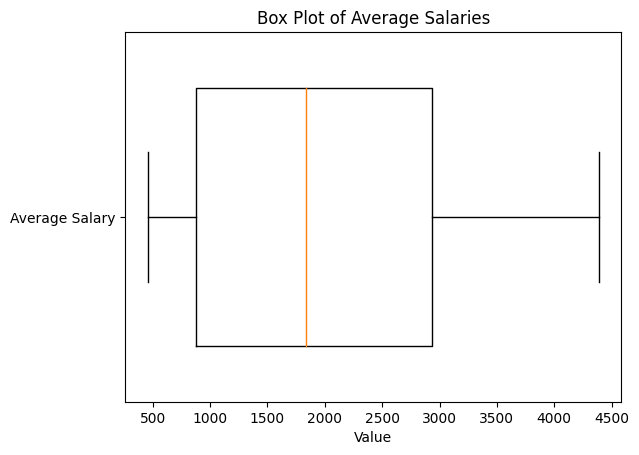

In [126]:
df['avg'] = df.groupby('Посада').apply(fill_avg_salary).reset_index(level=0, drop=True)

avg_an_stat = df['avg'].describe()

avg_an_stat.to_csv('updated_data.csv', index=True)

quartiles = [avg_an_stat['min'], avg_an_stat['25%'], avg_an_stat['50%'], avg_an_stat['75%'], avg_an_stat['max']]

fig, ax = plt.subplots()

ax.boxplot([quartiles], vert=False, widths=0.7)
ax.set_title('Box Plot of Average Salaries')
ax.set_yticklabels(['Average Salary'])
ax.set_xlabel('Value')

plt.show()